In [12]:
import pandas as pd
import matplotlib.pyplot as plt


### Functions

In [79]:
def plot_benchmark(df, single=False, show=True, figure=False, only_omp=False, only_mpi=False):
    if figure:
        plt.figure(figsize=(12, 8))

    if single:
        thread_data = df[df['Number Of Processes'] == 1]
        if only_omp:
            plt.plot(thread_data['Number Of Threads'], 
                    thread_data['Time'],
                    marker='o',
                    color='grey',
                    linestyle='-.',
                    label="Only OMP 1 Process, 1 to 256 Threads (x axis)",
            )
        elif only_mpi:
            thread_data = df[df['Number Of Threads'] == 1]
            plt.plot(thread_data['Number Of Processes'], 
                    thread_data['Time'],
                    marker='o',
                    color='black',
                    linestyle='--',
                    label="Only MPI 1 Thread, 1 to 256 Processes (x axis)",
            )
    else:
        for thread_count in df['Number Of Threads'].unique():
            # Get data for this thread count
            thread_data = df[df['Number Of Threads'] == thread_count]
        
            # Plot time vs number of processes for this thread count
            plt.plot(thread_data['Number Of Processes'], 
                    thread_data['Time'],
                    marker='o',
                    label=f'{thread_count} Thread{"s" if thread_count > 1 else ""}')

    plt.xlabel('Number of Processes')
    plt.ylabel('Time (seconds)')
    plt.title(f'Rendering Time vs Number of Processes for Different Thread Counts')
    plt.grid(True)
    plt.legend()
    plt.xscale('log', base=2)  # Since processes increase by powers of 2
    plt.yscale('log')  # Log scale makes the trends clearer

    # Add horizontal line at y=1 to show baseline performance
    plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)

    plt.tight_layout()
    if show:
        plt.show()


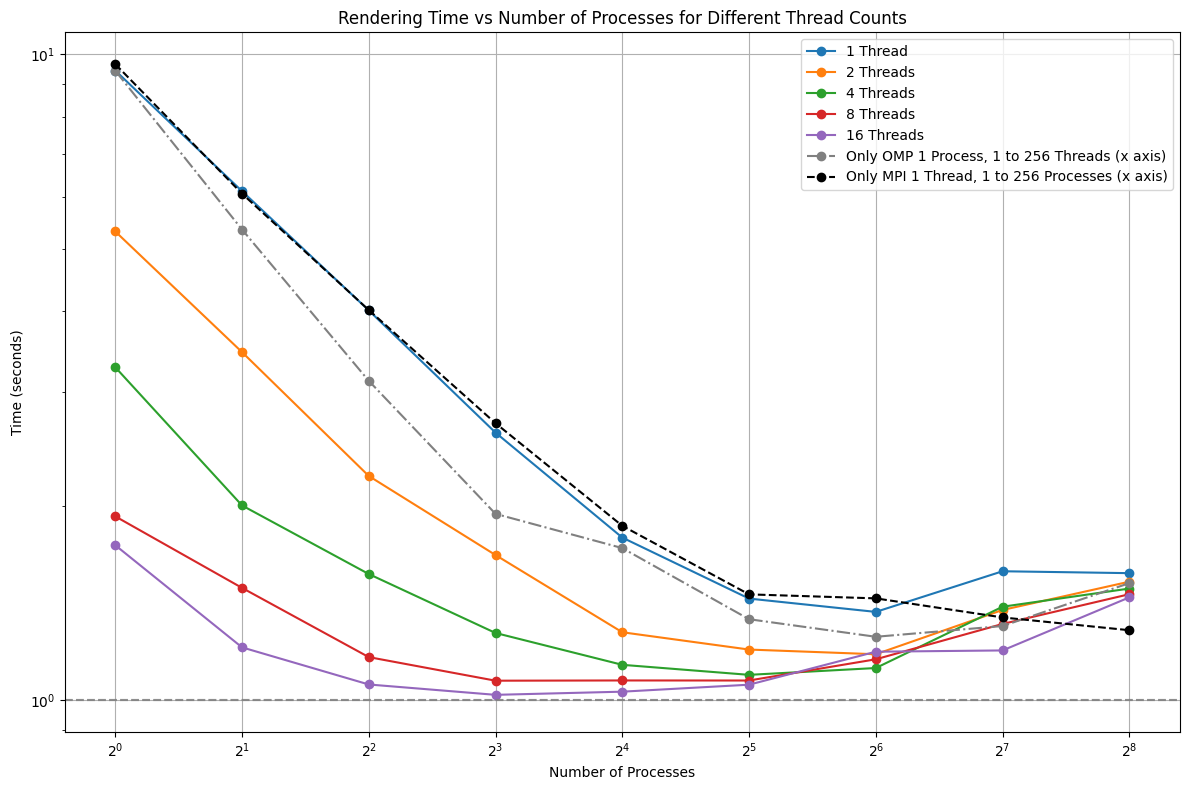

In [80]:
df_omp_mpi = pd.read_csv("benchmark_results_julia-omp-mpi.csv", sep=";", index_col=None)
plot_benchmark(df_omp_mpi, show=False, figure=True)
df_omp = pd.read_csv("benchmark_results_julia-omp.csv", sep=";", index_col=None)
plot_benchmark(df_omp, single=True, show=False, only_omp=True)
df_mpi = pd.read_csv("benchmark_results_julia-mpi.csv", sep=";", index_col=None)
plot_benchmark(df_mpi, single=True, show=True, only_mpi=True)


In [81]:
df_omp_mpi_5000 = pd.read_csv("benchmark_results_julia-omp-mpi-5000.csv", sep=";", index_col=None)
plot_benchmark(df_omp_mpi_5000, figure=True, show=False)

df_mpi_5000 = pd.read_csv("benchmark_results_julia-mpi-5000.csv", sep=";", index_col=None)
plot_benchmark(df_mpi_5000, figure=True, show=True, single=True, only_mpi=True)

TypeError: plot_benchmark() got multiple values for argument 'single'